# Save Processed Data

In [12]:
!pip install evalseg

Defaulting to user installation because normal site-packages is not writeable


In [10]:
!pip install memory_profiler

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import evalseg
import numpy as np
import os
import nibabel as nib
import csv
import cv2

## Get Ground Truth

In [5]:
task = 'Task001_LiverTumor'
source = '../CT_with_pkl'
# TODO add iteration to go through all Tasks

In [6]:
dataset=evalseg.io.Dataset(f'../medical-image-segmentation/{task}')

NameError: name 'evalseg' is not defined

In [7]:
def get_raw_gt(n:str):
    raw = nib.load(f'{source}/{n}.nii').get_fdata()
    gt = dataset.get_groundtruth(n).todense()
    #if gt.shape != raw.shape:
     #   raise Exception(f"{n} is not happy")
    return raw, gt

In [119]:
file = '/home/ntaleongpong/public/medical-image-segmentation/Task001_LiverTumor/GroundTruth/115.pkl'
file = '/home/ntaleongpong/public/medical-image-segmentation/Task001_LiverTumor/CT/115.nii'


In [166]:
raw, gt = get_raw_gt("219")
raw = np.asarray(raw.imag)
gt = np.asarray(gt.imag)

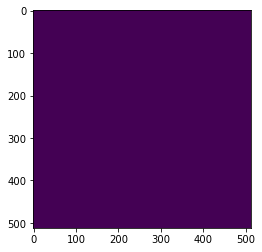

In [136]:
import matplotlib.pyplot as plt


i += 1
plt.imshow(np.transpose(raw, [2, 0, 1])[i])

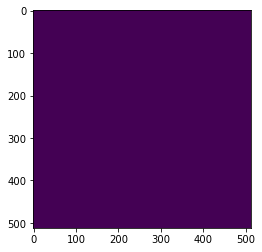

In [130]:
i += 1
plt.imshow(np.transpose(gt, [2, 0, 1])[i])

In [19]:
task = 'Task001_LiverTumor'
source = '../CT_with_pkl'
if not os.path.exists("./pairs"):
    os.mkdir("./pairs")

for file in os.listdir(source):
    raw_flag = False
    gt_flag = False
    num = file[0:len(file)-4]
    if not os.path.exists(f"./pairs/pair_{num}"):
        os.mkdir(f"./pairs/pair_{num}")
    raw, gt = get_raw_gt(num)
    for i in range(raw.shape[-1]):
        raw_img = np.transpose(raw, [2, 0, 1])[i]
        if not np.array_equal(raw_img, np.zeros(raw_img.shape)):
            raw_flag = True
    if raw_flag:
        if not os.path.exists(f"./pairs/pair_{num}/raw"):
            os.mkdir(f"./pairs/pair_{num}/raw")
        for i in range(raw_img.shape[-1]):
            if i < 99:
                if i < 9:
                    cv2.imwrite(f"./pairs/pair_{num}/raw/{num}-00{i+1}.png", raw_img)
                else:
                    cv2.imwrite(f"./pairs/pair_{num}/raw/{num}-0{i+1}.png", raw_img)
            else:
                cv2.imwrite(f"./pairs/pair_{num}/raw/{num}-{i+1}.png", raw_img)
    for i in range(gt.shape[-1]):
        gt_img = np.transpose(gt, [2, 0, 1])[i]
        if not np.array_equal(gt_img, np.zeros(gt_img.shape)):
            gt_flag = True
    if gt_flag:
        if not os.path.exists(f"./pairs/pair_{num}/gt"):
            os.mkdir(f"./pairs/pair_{num}/gt")
        for i in range(gt_img.shape[-1]):
            if i < 99:
                if i < 9:
                    cv2.imwrite(f"./pairs/pair_{num}/gt/{num}-00{i+1}.png", gt_img)
                else:
                    cv2.imwrite(f"./pairs/pair_{num}/gt/{num}-0{i+1}.png", gt_img)
            else:
                cv2.imwrite(f"./pairs/pair_{num}/gt/{num}-{i+1}.png", gt_img)
    print(f"pair_{num} done!")

pair_304 done!
pair_284 done!
pair_19 done!
pair_145 done!
pair_62 done!
pair_50 done!
pair_338 done!
pair_344 done!
pair_22 done!
pair_215 done!
pair_25 done!
pair_114 done!
pair_329 done!
pair_352 done!
pair_128 done!
pair_243 done!
pair_4 done!
pair_418 done!
pair_231 done!
pair_126 done!
pair_315 done!
pair_3 done!
pair_330 done!
pair_213 done!
pair_394 done!
pair_143 done!
pair_228 done!
pair_18 done!
pair_16 done!
pair_221 done!
pair_305 done!
pair_361 done!
pair_242 done!
pair_328 done!
pair_40 done!
pair_115 done!
pair_78 done!
pair_6 done!
pair_123 done!
pair_189 done!
pair_365 done!
pair_246 done!
pair_297 done!
pair_414 done!
pair_118 done!
pair_426 done!
pair_36 done!
pair_388 done!
pair_116 done!
pair_201 done!
pair_334 done!
pair_399 done!
pair_217 done!
pair_27 done!
pair_219 done!
pair_390 done!
pair_175 done!
pair_83 done!
pair_191 done!
pair_402 done!
pair_147 done!
pair_132 done!
pair_427 done!
pair_70 done!
pair_318 done!
pair_186 done!
pair_240 done!
pair_79 done!


ValueError: not enough values to unpack (expected 2, got 1)

In [5]:
def get_gt(n:str):
    gt = dataset.get_groundtruth(n).todense()
    #if gt.shape != raw.shape:
     #   raise Exception(f"{n} is not happy")
    return gt